In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv('../appliances-energy.csv')
df2=df.loc[:,['date','Appliances']]

In [101]:
df2.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 2 columns):
date          19735 non-null object
Appliances    19735 non-null int64
dtypes: int64(1), object(1)
memory usage: 308.5+ KB


In [103]:
df2.loc[:,'date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [104]:
df2.loc[:,'date']=pd.to_datetime(df2.loc[:,'date'])
df.loc[:,'date']=pd.to_datetime(df.loc[:,'date'])

In [105]:
df2.dtypes

date          datetime64[ns]
Appliances             int64
dtype: object

In [106]:
df2 = df2.set_index('date')

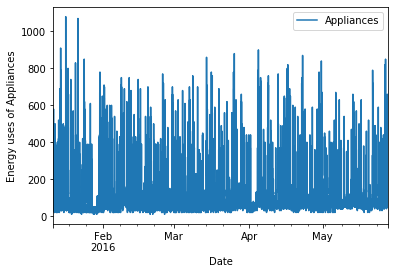

In [107]:
ax=df2.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Energy uses of Appliances')
plt.show()

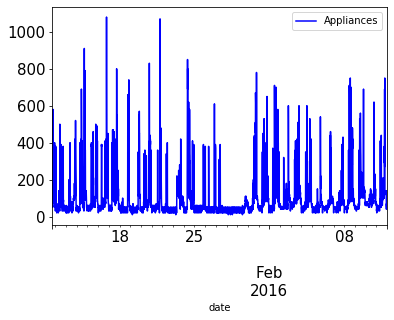

In [108]:
df2_subset=df2['2016-01-11':'2016-02-11']
ax=df2_subset.plot(color='blue', fontsize=15)
plt.tight_layout
plt.show()

In [109]:
df['weekday'] = df2.index.weekday
df['hour']=df2.index.hour

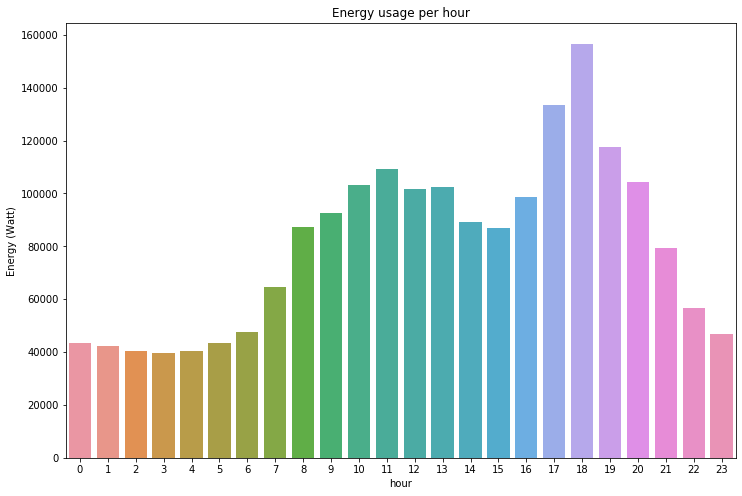

In [110]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('hour').Appliances.sum().index, 
                 y=df.groupby('hour').Appliances.sum().values, data=df)
ax.set_title('Energy usage per hour')
ax.set_ylabel('Energy (Watt)')
plt.show()

In [111]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
visData = go.Scatter( x = df.groupby('hour').Appliances.sum().index  ,  mode = "lines+markers",
                      y = df.groupby('hour').Appliances.sum().values )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Hour'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [112]:
df.loc['2016-01-11']

KeyError: '2016-01-11'

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
visData = go.Scatter( x = df.loc['2016-01-11':'2016-02-11']  , 
                     mode = "lines+markers",
                      y = df.Appliances)
layout = go.Layout(title = 'Appliance energy consumption pattern' ,
                   xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [113]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df['2016-01-11':'2016-02-11'], 
                 y=df.Appliances)
ax.set_title('Energy usage per hour')
ax.set_ylabel('Energy (Watt)')
plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2016-01-11] of <class 'str'>

<Figure size 864x576 with 0 Axes>